# pyZDCF examples

Here, we introduce a few simple examples on how to use **`pyZDCF`** module. The test data is provided in the` ../tests/test_data/` folder of this repository.

## Calculating cross-correlation between two light curves

In [1]:
# Standard libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Custom library
from pyzdcf import pyzdcf

In [2]:
test_data = '../tests/test_data/test_lc1/'          # Location of the input data
results = '../tests/test_data/test_lc1/results_py/' # Location of the directory for saving the results

# Light curve names
lc1 = 'lcx_1000'
lc2 = 'lcy_1000'

# Define parameters in a dictionary

params = dict(autocf            =  False,      # Autocorrelation (T) or cross-correlation (F)
              prefix            = 'ccf_test',  # Output files prefix
              uniform_sampling  =  False,      # Uniform sampling?
              omit_zero_lags    =  True,       # Omit zero lag points?
              minpts            =  0,          # Min. num. of points per bin (0 is a flag for default value of 11)
              num_MC            =  100,        # Num. of Monte Carlo simulations for error estimation
              lc1_name          =  lc1,        # Name of the first light curve file
              lc2_name          =  lc2         # Name of the second light curve file
             )

In [3]:
# We use non-interactive mode (intr=False)
dcf_df = pyzdcf(input_dir=test_data, output_dir=results, intr=False, parameters = params, sep=',')


pyZDCF begins:

pyZDCF PARAMETERS:

Autocorrelation?   False
Uniform sampling?  False
Omit zero lags?    True
Minimal # in bin:  11
# of Monte Carlo:  100
Monte Carlo seed:  123456

Binning with minimum of 11 points per bin and resolution of 0.001

662 bins actually used, 667691 inter-dependent pairs discarded.


ccf_test.dcf written...

pyZDCF ended.



In [4]:
# Results are stored into a pandas dataframe

dcf_df.head()

,tau,-sig(tau),+sig(tau),dcf,-err(dcf),+err(dcf),#bin
0,-991.0,4.0,0.0,0.135980,0.361559,0.342224,10.0
1,-988.0,2.0,0.0,-0.217733,0.279988,0.301034,13.0
2,-985.0,2.0,0.0,-0.061494,0.266546,0.271350,16.0
3,-982.0,2.0,0.0,0.239601,0.237615,0.223317,19.0
4,-979.0,2.0,0.0,0.331415,0.208171,0.192523,22.0


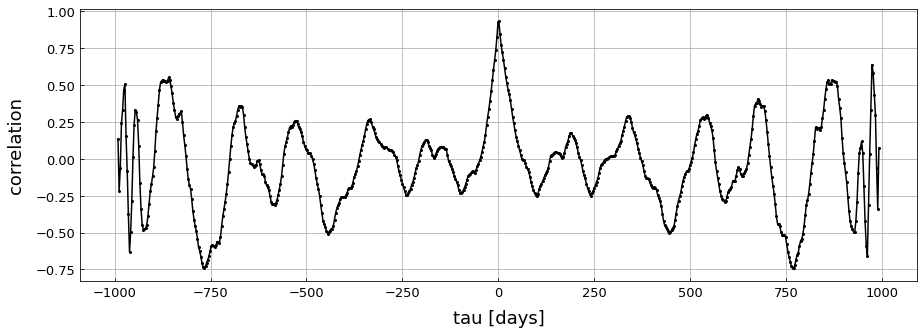

In [5]:
# Plot the obtained correlation function

fig = plt.figure(figsize=(15,5))

tt = dcf_df.tau
yy = dcf_df.dcf


ax = fig.add_subplot(111)
ax.plot(tt, yy, 'ko-', markersize = 2)

custom_xlim = (0, 1000)
custom_ylim = (yy.min()-0.1, yy.max()+0.1)
ax.set_xlabel('tau [days]', fontsize = 18, labelpad=10)
ax.set_ylabel('correlation', fontsize = 18, labelpad=10)
ax.tick_params(direction='in', pad = 5, labelsize=13)
#plt.setp(ax, xlim=custom_xlim, ylim=custom_ylim)
#ax.legend(fontsize=15)
ax.grid(True)

## Calculating cross-correlation for a list of 10 light curve pairs

In [6]:
test_data = '../tests/test_data/test_lcs/'          # Location of the input data
results = '../tests/test_data/test_lcs/results_py/' # Location of the directory for saving the results

# Light curve names (in my test data, all light curves start with 'lcx' or 'lcy' followed by a number)
lc1 = 'lcx'
lc2 = 'lcy'

# Parameters
params = dict(autocf            =  False,      # Autocorrelation (T) or cross-correlation (F)
              prefix            =  None,       # Output files prefix
              uniform_sampling  =  False,      # Uniform sampling?
              omit_zero_lags    =  True,       # Omit zero lag points?
              minpts            =  0,          # Min. num. of points per bin (0 is a flag for default value of 11)
              num_MC            =  100,        # Num. of Monte Carlo simulations for error estimation
              lc1_name          =  None,       # Name of the first light curve file
              lc2_name          =  None        # Name of the second light curve file
             )

# We set prefix, and lc names to None because they will be changed when we loop over each light curve pair
# Rest of the parameters remain the same

In [8]:
dcfs = []

# Looping over 10 light curve pairs
for i in range(1,11):
    
    params['lc1_name'] = lc1+str(i)
    params['lc2_name'] = lc2+str(i)
    params['prefix'] = 'ccf_test'+str(i)
    
    # Calling pyzdcf (set verbose=False to turn off printing of the status and parameter information)
    dcf_df = pyzdcf(input_dir=test_data, output_dir=results, intr=False, parameters = params, sep=',', verbose=False)
    # Adding results to a list for later use
    dcfs.append(dcf_df)
    print(f'Light curve pair num. {i}: DONE')

Light curve pair num. 1: DONE
Light curve pair num. 2: DONE
Light curve pair num. 3: DONE
Light curve pair num. 4: DONE
Light curve pair num. 5: DONE
Light curve pair num. 6: DONE
Light curve pair num. 7: DONE
Light curve pair num. 8: DONE
Light curve pair num. 9: DONE
Light curve pair num. 10: DONE


In [11]:
# Check the results for light curve pair num. 7
dcfs[6].head()

,tau,-sig(tau),+sig(tau),dcf,-err(dcf),+err(dcf),#bin
0,-991.0,4.0,0.0,0.011473,0.359384,0.357717,10.0
1,-988.0,2.0,0.0,0.309605,0.289672,0.261440,13.0
2,-985.0,2.0,0.0,0.278174,0.258849,0.238877,16.0
3,-982.0,2.0,0.0,-0.008930,0.244346,0.244914,19.0
4,-979.0,2.0,0.0,-0.195255,0.211629,0.221647,22.0


These results are saved here: `../tests/test_data/test_lcs/results_py/`.